### Importing libraries 

In [35]:
import numpy as np #multidimension array
import pandas as pd #for data manipulation
import matplotlib.pyplot as plt# for visualization
import seaborn as sns #for visualization 

### Loading datatset

In [36]:
dataset = pd.read_csv('./data/processed_tweet_data.csv')
dataset.head(2)

,created_at,source,text,polarity,subjectivity,lang,fav_count,retweet_count,screen_name,follower_count,friends_count,sensitivity,hashtags,mentions,location
0,Fri Apr 22 22:20:18 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @nikitheblogger: Irre: Annalena Baerbock sa...,0.0,0.0,de,113,355,nikitheblogger,3,12,False,[],"[{'screen_name': 'nikitheblogger', 'name': 'Ne...",NaN
1,Fri Apr 22 22:19:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...,0.0,0.0,de,113,505,sagt_mit,3,12,False,[],"[{'screen_name': 'sagt_mit', 'name': 'Sie sagt...",NaN


In [37]:
dataset.tail(2)

,created_at,source,text,polarity,subjectivity,lang,fav_count,retweet_count,screen_name,follower_count,friends_count,sensitivity,hashtags,mentions,location
24623,Fri Apr 22 14:44:08 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @news24tvchannel: CM नीतीश कुमार ने तेजस्वी...,0.0,0.0,hi,31392,301,news24tvchannel,706,643,False,[],"[{'screen_name': 'news24tvchannel', 'name': 'N...",Noida
24624,Fri Apr 22 14:43:01 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @suvegrathi: भगवान और खुदा आपस में बात कर र...,0.0,0.0,hi,31392,12,suvegrathi,706,643,False,[],"[{'screen_name': 'suvegrathi', 'name': 'Suveg ...",India


#### Data Exploration

In [38]:
# shape of data
dataset.shape

(24625, 15)

In [39]:
# columns
dataset.columns

Index(['created_at', 'source', 'text', 'polarity', 'subjectivity', 'lang',
       'fav_count', 'retweet_count', 'screen_name', 'follower_count',
       'friends_count', 'sensitivity', 'hashtags', 'mentions', 'location'],
      dtype='object')

In [40]:
# datatypes
dataset.dtypes

created_at         object
source             object
text               object
polarity          float64
subjectivity      float64
lang               object
fav_count           int64
retweet_count       int64
screen_name        object
follower_count      int64
friends_count       int64
sensitivity          bool
hashtags           object
mentions           object
location           object
dtype: object

In [41]:
# checking for null values in data
#missing value 
dataset.isnull().sum()

created_at            0
source                0
text                  0
polarity              0
subjectivity          0
lang                  0
fav_count             0
retweet_count         0
screen_name        6548
follower_count        0
friends_count         0
sensitivity           0
hashtags              0
mentions              0
location          15346
dtype: int64

# Task
+ Text
  - Text preprocessing
  - Sentiment Analysis
  - Keyword Extraction
  - Entity Extraction

In [42]:
# devices with these tweets 
set(dataset['source'])

{'<a href="http://fllwrs.com" rel="nofollow">fllwrs</a>',
 '<a href="http://gujarati.oneindia.com/" rel="nofollow">Oneindia Gujarat</a>',
 '<a href="http://hindi.goodreturns.in/" rel="nofollow">Goodreturns Hindi</a>',
 '<a href="http://instagram.com" rel="nofollow">Instagram</a>',
 '<a href="http://itdimension.intoday.in" rel="nofollow"> IndiaTodayFLASH</a>',
 '<a href="http://kannada.goodreturns.in/" rel="nofollow">Goodreturns Kannada</a>',
 '<a href="http://malayalam.oneindia.in/" rel="nofollow">Oneindia Malayalam</a>',
 '<a href="http://publicize.wp.com/" rel="nofollow">WordPress.com</a>',
 '<a href="http://rechargeduniya.com/" rel="nofollow">current news </a>',
 '<a href="http://technoperiod.blogspot.com" rel="nofollow">tweeter_biases</a>',
 '<a href="http://tweepsmap.com" rel="nofollow">Tweepsmap</a>',
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
 '<a href="http://twitte

In [43]:
# count of tweets per devices
dataset['source'].value_counts()

<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>    10804
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>       5375
<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                  5114
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>         597
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       270
                                                                                        ...  
<a href="https://www.24liveblog.com/" rel="nofollow">24liveblog</a>                         1
<a href="https://www.loomly.com/" rel="nofollow">Loomly</a>                                 1
<a href="https://ifttt.com" rel="nofollow">IFTTT</a>                                        1
<a href="http://tweepsmap.com" rel="nofollow">Tweepsmap</a>                                 1
<a href="https://usepostly.com" rel="nofollow">Postly-Fast C

<AxesSubplot:>

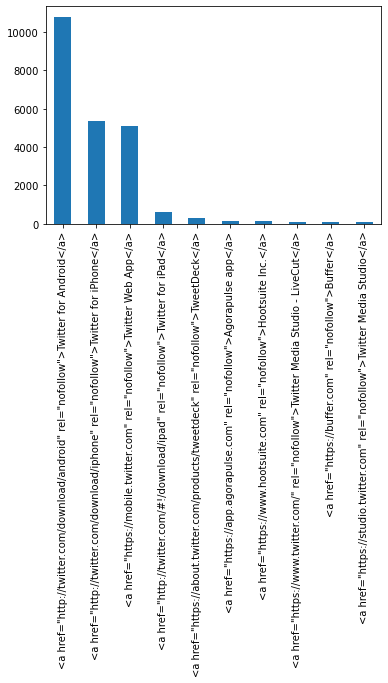

In [44]:
# plot the top 10 sources
dataset['source'].value_counts()[:10].plot(kind='bar')

[Text(0.5, 0, 'polarity'),
 Text(1.5, 0, 'subjectivity'),
 Text(2.5, 0, 'fav_count'),
 Text(3.5, 0, 'retweet_count'),
 Text(4.5, 0, 'follower_count'),
 Text(5.5, 0, 'friends_count'),
 Text(6.5, 0, 'sensitivity')]

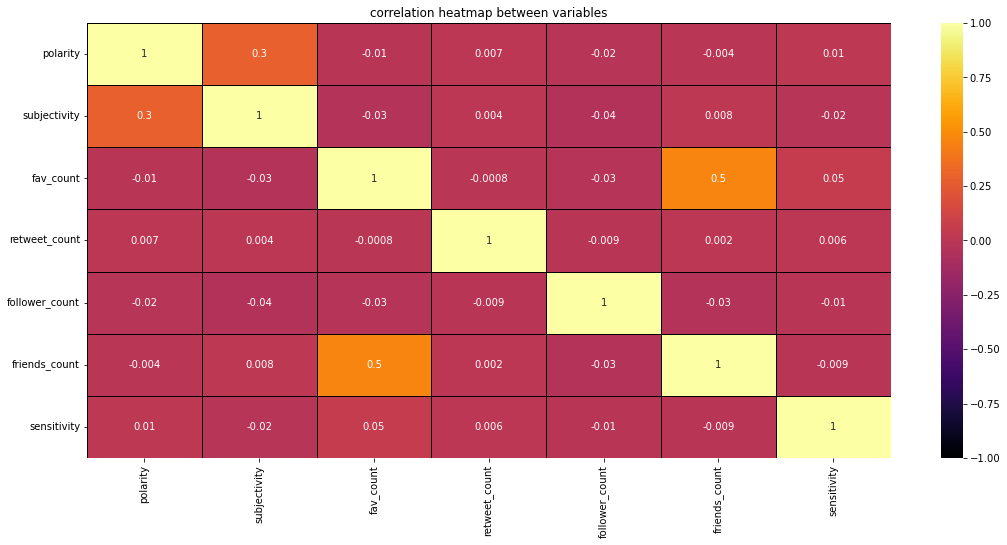

In [45]:
fig = (18,8)
plt.figure(figsize=fig)
heatmap = sns.heatmap(dataset.corr(method='pearson'), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='inferno', linewidths=1, linecolor='Black')
heatmap.set_title('correlation heatmap between variables')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)